In [1]:
#Proje-1 : K-means algoritması ile kredi kartı müşterilerinin kümelendirilmesi

In [2]:
#Temel Bileşenler Analizi (Principal Component Analysis - PCA, bir Dimension Reduction metodu)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.shape

(569, 30)

In [6]:
scalar = StandardScaler()
scalar.fit(df)
scaled_data = scalar.transform(df)

In [7]:
pca = PCA(n_components = 3)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [8]:
print("Before PCA : ", df.shape)
print("After PCA : ", x_pca.shape)

Before PCA :  (569, 30)
After PCA :  (569, 3)


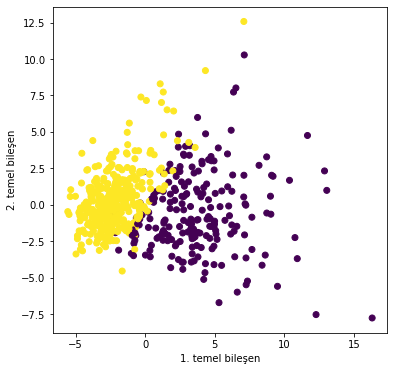

In [9]:
plt.figure(figsize = (6,6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = cancer['target'])

plt.xlabel("1. temel bileşen")
plt.ylabel("2. temel bileşen")
plt.show()

In [10]:
cc_dframe = pd.read_csv("mydata/credit_card_md.csv")
cc_dframe.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [11]:
cc_dframe.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
cc_dframe.loc[(cc_dframe['MINIMUM_PAYMENTS'].isnull() == 
True), 'MINIMUM_PAYMENTS'] = cc_dframe['MINIMUM_PAYMENTS'].mean()

cc_dframe.loc[(cc_dframe['CREDIT_LIMIT'].isnull() == 
True), 'CREDIT_LIMIT'] = cc_dframe['CREDIT_LIMIT'].mean()

In [13]:
cc_dframe.drop('CUST_ID', axis = 1, inplace = True)

In [14]:
scaler = StandardScaler()
cc_dframe_scaled = scaler.fit_transform(cc_dframe)

In [15]:
cc_dframe_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

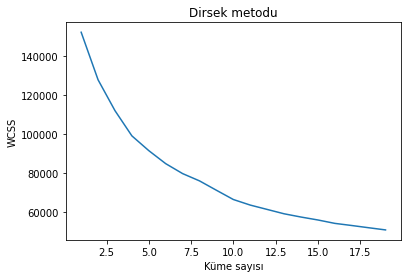

In [16]:
#WCSS (within cluster sum of squares error)
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(cc_dframe_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('Dirsek metodu')
plt.xlabel('Küme sayısı')
plt.ylabel('WCSS')
plt.show()

In [42]:
kmeans = KMeans(n_clusters = 8, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

In [43]:
y_kmeans = kmeans.fit_predict(cc_dframe_scaled)
y_kmeans[:100]

array([0, 3, 5, 0, 0, 5, 1, 5, 0, 4, 5, 0, 5, 5, 0, 3, 7, 4, 5, 5, 5, 1,
       5, 3, 0, 5, 0, 5, 3, 0, 3, 5, 0, 5, 5, 0, 3, 5, 3, 3, 0, 5, 0, 0,
       5, 0, 7, 0, 2, 0, 3, 5, 0, 7, 5, 0, 0, 1, 0, 0, 0, 0, 0, 4, 5, 5,
       7, 0, 5, 0, 5, 3, 7, 5, 0, 5, 5, 5, 0, 3, 5, 4, 4, 2, 1, 2, 3, 3,
       0, 3, 1, 3, 0, 0, 0, 0, 5, 0, 4, 7])

In [44]:
clusters = pd.DataFrame(data = y_kmeans, columns = ['clusters'])
clusters

,clusters
0,0
1,3
2,5
3,0
4,0
...,...
8945,7
8946,7
8947,7
8948,7


In [45]:
for i in cc_dframe_scaled:
    grid = sns.FacetGrid(cc_dframe_scaled, col = 'clusters')
    grid.map(plt.hist, i, bins = 60)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [53]:
pca = PCA(n_components = 8)
pca.fit(cc_dframe_scaled)

x_pca = pca.transform(cc_dframe_scaled)

print('variance ratio:', pca.explained_variance_ratio_)
print('sum:', sum(pca.explained_variance_ratio_))

varience ratio: [0.27290037 0.20301991 0.08791979 0.07479975 0.06262792 0.05750211
 0.04887235 0.04257486]
sum: 0.8502170652502


TypeError: 'str' object is not callable

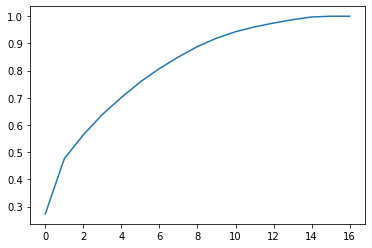

In [54]:
pca = PCA(whiten = True).fit(cc_dframe_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("küme sayısı")
plt.ylabel("cumulative explained varience")
plt.show()

In [55]:
df_sns = pd.DataFrame({"var": pca.explained_variance_ratio_, "PC" : ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12", "PC13", "PC14", "PC15", "PC16", "PC17"]})
df_sns

,var,PC
0,2.729004e-01,PC1
1,2.030199e-01,PC2
2,8.791979e-02,PC3
3,7.479975e-02,PC4
4,6.262792e-02,PC5
5,5.750211e-02,PC6
6,4.887235e-02,PC7
7,4.257486e-02,PC8
8,3.828804e-02,PC9
9,3.080006e-02,PC10


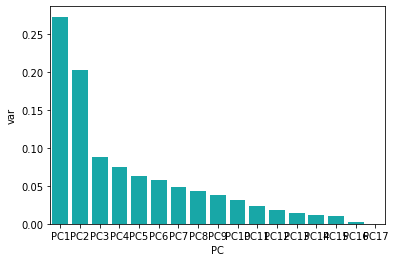

In [49]:
sns.barplot(x = 'PC', y = 'var', data = df_sns, color = 'c')
plt.ylabel = ('Varience Explained')
plt.xlabel = ('Principle Components')
plt.show()

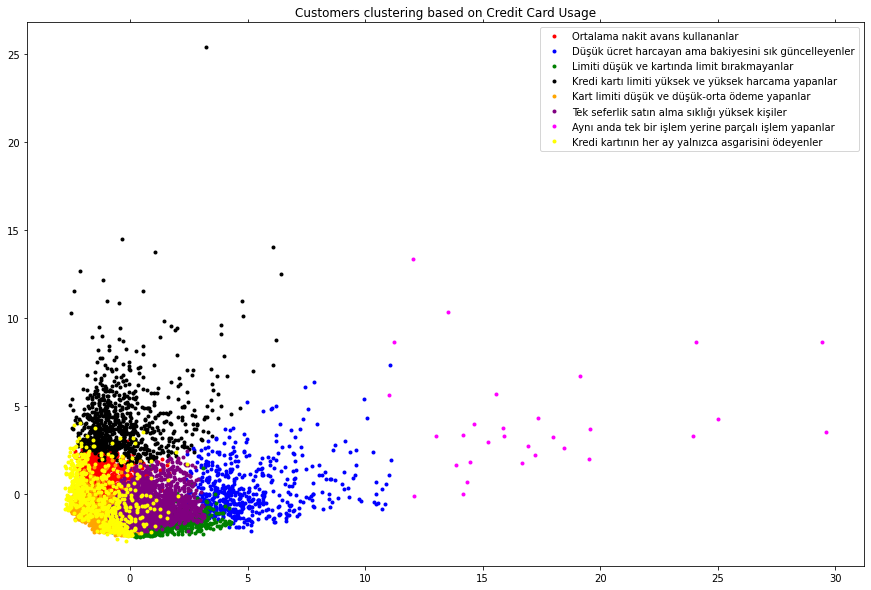

In [51]:
x, y = x_pca[:, 0], x_pca[:, 1]

colors = {0 : 'red', 1 : 'blue', 2 : 'green', 3 : 'black', 4 : 'orange', 5 : 'purple', 6 : 'magenta', 7 : 'yellow'}

names = {0 : 'Ortalama nakit avans kullananlar',
         1 : 'Düşük ücret harcayan ama bakiyesini sık güncelleyenler',
         2 : 'Limiti düşük ve kartında limit bırakmayanlar', 
         3 : 'Kredi kartı limiti yüksek ve yüksek harcama yapanlar', 
         4 : 'Kart limiti düşük ve düşük-orta ödeme yapanlar',
         5 : 'Tek seferlik satın alma sıklığı yüksek kişiler',
         6 : 'Aynı anda tek bir işlem yerine parçalı işlem yapanlar',
         7 : 'Kredi kartının her ay yalnızca asgarisini ödeyenler'}

df = pd.DataFrame({'x' : x, 'y' : y, 'label' : y_kmeans})
groups = df.groupby('label')

fig, ax = plt.subplots(figsize = (15, 10))
for name, group in groups:
    ax.plot(group.x, group.y, marker = 'o', linestyle = '', ms = 4, color = colors[name], label = names[name], mec = 'none')
    ax.set_aspect('auto')
    ax.tick_params(axis = 'x', which = 'both', bottom = 'off', top = 'off', labelbottom = 'off')
    ax.tick_params(axis = 'y', which = 'both', bottom = 'off', top = 'off', labelbottom = 'off')
    
ax.legend()
ax.set_title('Customers clustering based on Credit Card Usage')
plt.show()